In [1]:
!git clone https://github.com/deep-learning-with-pytorch/dlwpt-code.git

Cloning into 'dlwpt-code'...
remote: Enumerating objects: 703, done.
remote: Total 703 (delta 0), reused 0 (delta 0), pack-reused 703
Receiving objects: 100% (703/703), 176.00 MiB | 28.58 MiB/s, done.
Resolving deltas: 100% (309/309), done.
Updating files: 100% (228/228), done.


In [4]:
import torch
import torch.nn as nn

In [5]:
conv = nn.Conv2d(3, 16, kernel_size=3)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1))

In [6]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [7]:
from torchvision import datasets
data_path = "/content/"
cifar10 = datasets.CIFAR10(data_path, train=True, download=True)
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True)

100%|██████████| 170498071/170498071 [00:02<00:00, 79601133.33it/s]


Extracting /content/cifar-10-python.tar.gz to /content/
Files already downloaded and verified


In [8]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

img, label = cifar10[99]
img, label, class_names[label]

(<PIL.Image.Image image mode=RGB size=32x32 at 0x7FEA5284D270>,
 1,
 'automobile')

In [10]:
from torchvision import transforms
dir(transforms)

['AugMix',
 'AutoAugment',
 'AutoAugmentPolicy',
 'CenterCrop',
 'ColorJitter',
 'Compose',
 'ConvertImageDtype',
 'ElasticTransform',
 'FiveCrop',
 'GaussianBlur',
 'Grayscale',
 'InterpolationMode',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'PILToTensor',
 'Pad',
 'RandAugment',
 'RandomAdjustSharpness',
 'RandomAffine',
 'RandomApply',
 'RandomAutocontrast',
 'RandomChoice',
 'RandomCrop',
 'RandomEqualize',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomInvert',
 'RandomOrder',
 'RandomPerspective',
 'RandomPosterize',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSolarize',
 'RandomVerticalFlip',
 'Resize',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 'TrivialAugmentWide',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_functional_pil',
 '_functional_tensor',
 '_presets',
 'autoaugment',
 'functional',
 'transforms']

In [11]:
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
tensor_cifar10_val = datasets.CIFAR10(data_path, train=False, download=False, transform=transforms.ToTensor())

In [12]:
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
imgs.shape

torch.Size([3, 32, 32, 50000])

In [13]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label]) for img, label in tensor_cifar10 if label in [0,2]]
cifar2_val = [(img, label_map[label]) for img, label in tensor_cifar10_val if label in [0,2]]

In [14]:
img, _ = cifar2[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 16, 30, 30]))

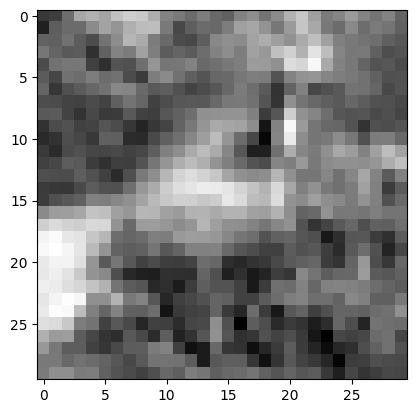

In [15]:
from matplotlib import pyplot as plt
plt.imshow(output[0,0].detach(), cmap='gray')
plt.show()

In [16]:
conv = nn.Conv2d(3,1,kernel_size=3, padding=1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [18]:
with torch.no_grad():
    conv.bias.zero_()
with torch.no_grad():
    conv.weight.fill_(1.0/9.0)

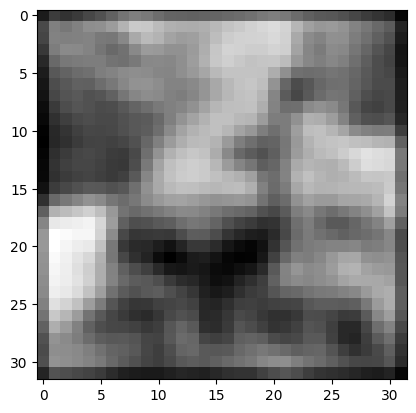

In [20]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0,0].detach(), cmap='gray')
plt.show()

In [22]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1,0,1],
                                  [-1,0,1],
                                  [-1,0,1]])
    conv.bias.zero_()

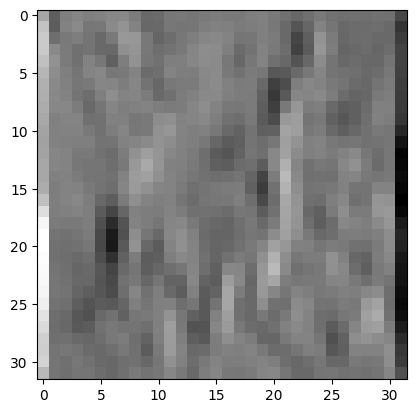

In [23]:
output = conv(img.unsqueeze(0))
plt.imshow(output[0,0].detach(), cmap='gray')
plt.show()

In [24]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [27]:
from torch.nn.modules.pooling import MaxPool2d
model = nn.Sequential(
    nn.Conv2d(3, 16, kernel_size=3, padding = 1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16,8,kernel_size=3,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    #
    nn.Linear(8*8*8, 32),
    nn.Tanh(),
    nn.Linear(32,2)
)

In [30]:
model(img.unsqueeze(0))

RuntimeError: ignored

In [31]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=3,padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16,8,kernel_size=3,padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8*8*8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32,2)
    
    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1,8*8*8)    # 차원 정보 변경
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [32]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [33]:
import torch.nn.functional as F

# 함수형으로 대체
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,16,kernel_size=3,padding=1)
        self.conv2 = nn.Conv2d(16,8,kernel_size=3,padding=1)
        self.fc1 = nn.Linear(8*8*8, 32)
        self.fc2 = nn.Linear(32,2)
    
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1,8*8*8)    # 차원 정보 변경
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [36]:
model = Net()
model(img.unsqueeze(0))

tensor([[0.0674, 0.1359]], grad_fn=<AddmmBackward0>)

In [ ]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs+1):
        loss_train = 0.0
        for imgs, labels in train_loader:   # 데이터 로더가 만들어준 배치 안에서 데이터셋을 순회함
            outputs = model(imgs)   # 모델에 배치를 넣어줌
            loss = loss_fn(outputs, labels) # 그리고 최소화하려는 손실값을 계산
            optimizer.zero_grad()   # 마지막에 이전 기울기 값을 지움
            loss.backward() # 역전파 수행. 즉 신경망이 학습할 모든 파라미터에 대한 기울기를 계산함
            optimizer.step()
            loss_train += loss.item()   # 에포크 동안 확인한 손실값을 모두 더한다. 기울기값을 꺼내고자 .item()을 사용해 손실값을 파이썬 수로 변환하는 것은 중요하므로 잘 기억해두자

    if epoch == 1 or epoch % 10 == 0:
        print('{} Epoch {}, Training loss {'.format(
            datetime.datetime.now(), epoch,
            loss_train/len(train_loader)    # 배치 단위의 평균 손실값을 구하기 위해 훈련 데이터 로더의 길이로 나눈다.
        ))        